In [1]:
!pip install gdown==5.0.0
!pip install googletrans==4.0.0-rc1

# Imports

In [2]:
import gdown
from googletrans import Translator
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
from PIL import Image
import shutil
import torch
from tqdm import tqdm
from transformers import CLIPProcessor, CLIPModel
import zipfile

# Device Check

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Getting Images

In [4]:
imgs_file_id = '15ed8TXY9Pzk68_SCooFm7AfkeFtCd16Q' # resized images

download_link = f'https://drive.google.com/uc?id={imgs_file_id}'
test_imgs_zip = gdown.download(download_link, quiet=False)

if os.path.exists('/content/test_imgs'):
  shutil.rmtree('/content/test_imgs')

with zipfile.ZipFile(test_imgs_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/test_imgs')

os.remove(test_imgs_zip)

Downloading...
From (original): https://drive.google.com/uc?id=15ed8TXY9Pzk68_SCooFm7AfkeFtCd16Q
From (redirected): https://drive.google.com/uc?id=15ed8TXY9Pzk68_SCooFm7AfkeFtCd16Q&confirm=t&uuid=99f3cc42-5963-40fe-ad87-d44dfe3f2bd6
To: /content/test_images_resized.zip
100%|██████████| 600M/600M [00:03<00:00, 174MB/s]


# Getting Data

In [5]:
data_file_id = '10vDZsY0EhzvFFR8IF-3P_2ApOF0GIMML' # data

download_link = f'https://drive.google.com/uc?id={data_file_id}'
test_data_zip = gdown.download(download_link, quiet=False)

if os.path.exists('/content/test_data'):
  shutil.rmtree('/content/test_data')

with zipfile.ZipFile(test_data_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/test_data')

os.remove(test_data_zip)

Downloading...
From: https://drive.google.com/uc?id=10vDZsY0EhzvFFR8IF-3P_2ApOF0GIMML
To: /content/test.data.v1.1.gold.zip
100%|██████████| 36.8k/36.8k [00:00<00:00, 18.9MB/s]


## Getting english data

In [6]:
en_data_df = pd.read_csv('/content/test_data/en.test.data.v1.1.txt', sep='\t', names=['target_word', 'full_phrase', 'image_1', 'image_2', 'image_3', 'image_4', 'image_5', 'image_6', 'image_7', 'image_8', 'image_9', 'image_10'])

In [7]:
en_data_df

,target_word,full_phrase,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10
0,goal,football goal,image.4418.jpg,image.4416.jpg,image.4417.jpg,image.4413.jpg,image.4412.jpg,image.4415.jpg,image.4419.jpg,image.4414.jpg,image.2166.jpg,image.1150.jpg
1,mustard,mustard seed,image.4429.png,image.4422.jpg,image.4423.jpg,image.4424.jpg,image.4421.jpg,image.4427.jpg,image.4426.jpg,image.4420.jpg,image.4425.jpg,image.4428.jpg
2,seat,eating seat,image.4435.jpg,image.4436.jpg,image.1166.jpg,image.4430.jpg,image.4433.jpg,image.4432.jpg,image.4438.jpg,image.4434.jpg,image.4431.jpg,image.4437.jpg
3,navigate,navigate the web,image.4439.jpg,image.4440.jpg,image.4441.jpg,image.4442.jpg,image.4444.jpg,image.4445.jpg,image.1435.jpg,image.4446.png,image.1434.jpg,image.4443.jpg
4,butterball,butterball person,image.4454.jpg,image.4450.jpg,image.4455.jpg,image.4453.jpg,image.4448.jpg,image.1253.jpg,image.4451.jpg,image.4452.jpg,image.4447.jpg,image.4449.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
458,cannabis,cannabis drug,image.8063.jpg,image.8064.jpg,image.4891.jpg,image.7450.jpg,image.8066.jpg,image.4454.jpg,image.8065.jpg,image.6775.jpg,image.1604.jpg,image.2540.jpg
459,crossroads,crossroads cars,image.8073.jpg,image.8076.jpg,image.8075.jpg,image.8070.jpg,image.8068.jpg,image.8074.jpg,image.8069.jpg,image.8071.jpg,image.8067.jpg,image.8072.jpg
460,clocks,time clocks,image.8082.jpg,image.8079.jpg,image.2094.jpg,image.8081.jpg,image.8077.jpg,image.8080.jpg,image.4995.jpg,image.8083.jpg,image.5251.jpg,image.8078.jpg
461,columba,columba stars,image.8087.jpg,image.8084.jpg,image.7279.jpg,image.192.jpg,image.93.jpg,image.8085.jpg,image.8088.jpg,image.4126.jpg,image.8086.jpg,image.8089.jpg


In [8]:
en_gold_df = pd.read_csv('/content/test_data/en.test.gold.v1.1.txt', sep='\t', names=['gold_label'])

In [9]:
en_gold_df

,gold_label
0,image.2166.jpg
1,image.4429.png
2,image.4432.jpg
3,image.1435.jpg
4,image.4455.jpg
...,...
458,image.8063.jpg
459,image.8069.jpg
460,image.8081.jpg
461,image.8089.jpg


## Getting italian data

In [10]:
it_data_df = pd.read_csv('/content/test_data/it.test.data.v1.1.txt', sep='\t', names=['target_word', 'full_phrase', 'image_1', 'image_2', 'image_3', 'image_4', 'image_5', 'image_6', 'image_7', 'image_8', 'image_9', 'image_10'])
it_gold_df = pd.read_csv('/content/test_data/it.test.gold.v1.1.txt', sep='\t', names=['gold_label'])

## Getting farsi data

In [11]:
fa_data_df = pd.read_csv('/content/test_data/fa.test.data.txt', sep='\t', names=['target_word', 'full_phrase', 'image_1', 'image_2', 'image_3', 'image_4', 'image_5', 'image_6', 'image_7', 'image_8', 'image_9', 'image_10'])
fa_gold_df = pd.read_csv('/content/test_data/fa.test.gold.txt', sep='\t', names=['gold_label'])

# CLIP Model

In [12]:
# SELECT THE ID OF THE MODEL YOU WANT TO USE (if error, restart the runtime)

model_id = "openai/clip-vit-base-patch16"
# model_id = "openai/clip-vit-base-patch32"

processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id)
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

# Task on English Data

## Image prediction
Here we use the CLIP model to predict the right image representing the phrase. In particular, the processor tokenizes the phrase and encodes the images so that they can be fed to the model. The `outputs.logits_per_image` contains the similarities between the phrase and all its candidate images. Finally, the predicted image is the one with the highest similarity (the argmax function is used to select it).

In [13]:
preds_list = [] # list of all the preds in order to save them successively into the txt delivery file

well_preds = 0 # counter for the well predicted images

for i in tqdm(range(0, len(en_data_df))):
  images = [] # list containing all the candidate images for the current phrase

  for j in range(1,11):
    images.append(Image.open('/content/test_imgs/test_images_resized/' + en_data_df['image_' + str(j)][i]))

  # these are the inputs of the clip model (e.g. )
  inputs = processor(text=en_data_df['full_phrase'][i],
                  padding=True,
                  images=images,
                  return_tensors='pt').to(device)

  outputs = model(**inputs)
  similarity_scores = outputs.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images

  pred = en_data_df['image_'+ str(torch.argmax(similarity_scores).item() + 1)][i] # we select the image with the highest similarity
  preds_list.append(pred)

  if pred == en_gold_df['gold_label'][i]:
    well_preds += 1


accuracy = well_preds / len(en_data_df)

100%|██████████| 463/463 [02:11<00:00,  3.51it/s]


In [14]:
print(f"Accuracy: {accuracy:.2f} ({well_preds} well predicted out of {len(en_data_df)})")

Accuracy: 0.63 (291 well predicted out of 463)


## Save the predictions into the delivery txt file

In [15]:
# len(preds_list)

In [16]:
# text_file_path = '/content/en.test.preds.txt' # the delivery file is saved in the /content directory of colab

# with open(text_file_path, 'w', encoding='utf-8') as text_file:
#     for pred in preds_list:
#         text_file.write(f"{pred}\n")

## Example on the first sample

In [17]:
images = [] # candidate images

for i in range(1,11):
  images.append(Image.open('/content/test_imgs/test_images_resized/' + en_data_df['image_' + str(i)][0]))

In [18]:
len(images) # 10 is right since there are ten candidate images for each phrase

10

In [19]:
inputs = processor(text=en_data_df['full_phrase'][0],
                   padding=True,
                   images=images,
                   return_tensors='pt').to(device)

outputs = model(**inputs)

In [20]:
similarity_scores = outputs.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images

In [21]:
similarity_scores

tensor([[23.1080],
        [20.4878],
        [22.1394],
        [22.5820],
        [20.6501],
        [22.8558],
        [20.6791],
        [26.1873],
        [32.7662],
        [25.3162]], device='cuda:0', grad_fn=<TBackward0>)

In [22]:
# pred = image_paths[torch.argmax(logits_per_image)]
pred = en_data_df['image_'+ str(torch.argmax(similarity_scores).item() + 1)][0]

In [23]:
print("The prediction is: ", pred)

The prediction is:  image.2166.jpg


Phrase:  football goal
Candidate images (below them there is the similarity score with the phrase): 


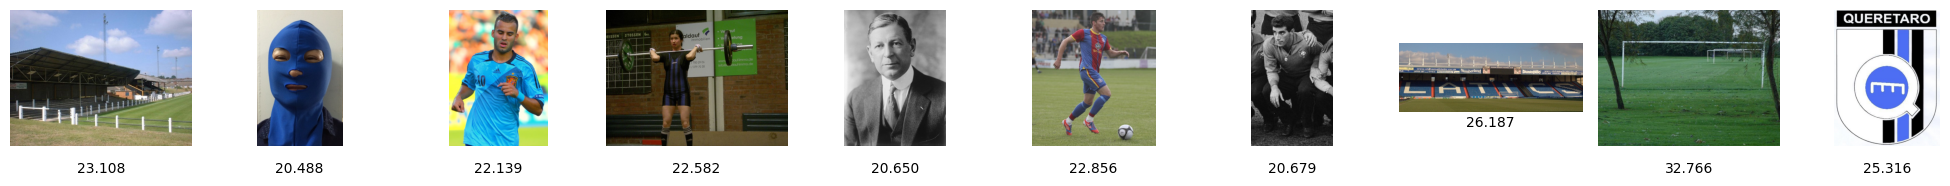



Predicted image: 


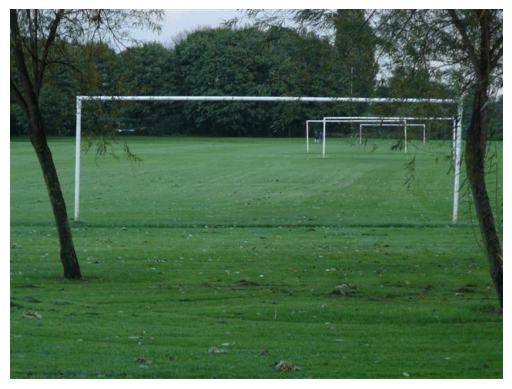



Gold image: 


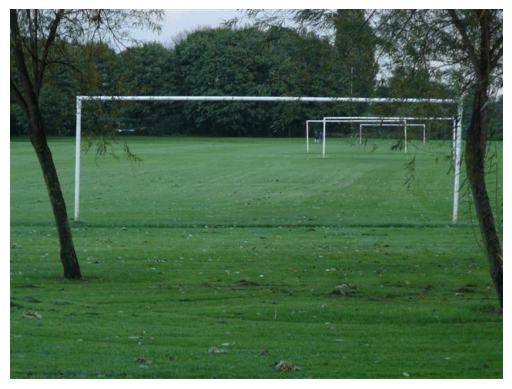

In [24]:
print("Phrase: ", en_data_df['full_phrase'][0])
print("Candidate images (below them there is the similarity score with the phrase): ")


imgs_dir = '/content/test_imgs/test_images_resized/'

image_paths = []

for i in range(1,11):
  image_paths.append(imgs_dir + en_data_df['image_' + str(i)][0])

fig, axes = plt.subplots(1, 10, figsize=(20, 2))

for i, ax in enumerate(axes):
    img_path = image_paths[i]
    img = mpimg.imread(img_path)

    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels

    ax.text(0.5, -0.2, f'{similarity_scores[i].item():.3f}', transform=ax.transAxes, ha='center')

plt.tight_layout()
plt.show()


print("\n\nPredicted image: ")
# Example image file path
image_path = imgs_dir + pred

# Read the image using Matplotlib
img = mpimg.imread(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


print("\n\nGold image: ")
# Example image file path
image_path = imgs_dir + en_gold_df['gold_label'][0]

# Read the image using Matplotlib
img = mpimg.imread(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Task on Italian Data

## Image prediction

In [25]:
preds_list = [] # list of all the preds in order to save them successively into the txt delivery file

well_preds = 0 # counter for the well predicted images

for i in tqdm(range(0, len(it_data_df))):
  images = [] # list containing all the candidate images for the current phrase

  for j in range(1,11):
    images.append(Image.open('/content/test_imgs/test_images_resized/' + it_data_df['image_' + str(j)][i]))

  # these are the inputs of the clip model (e.g. )
  inputs = processor(text=it_data_df['full_phrase'][i],
                  padding=True,
                  images=images,
                  return_tensors='pt').to(device)

  outputs = model(**inputs)
  similarity_scores = outputs.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images

  pred = it_data_df['image_'+ str(torch.argmax(similarity_scores).item() + 1)][i] # we select the image with the highest similarity
  preds_list.append(pred)

  if pred == it_gold_df['gold_label'][i]:
    well_preds += 1


accuracy = well_preds / len(it_data_df)

100%|██████████| 305/305 [01:24<00:00,  3.59it/s]


In [26]:
print(f"Accuracy: {accuracy:.2f} ({well_preds} well predicted out of {len(it_data_df)})")

Accuracy: 0.22 (67 well predicted out of 305)


## Save the predictions into the delivery txt file

In [27]:
# text_file_path = '/content/it.test.preds.txt' # the delivery file is saved in the /content directory of colab

# with open(text_file_path, 'w', encoding='utf-8') as text_file:
#     for pred in preds_list:
#         text_file.write(f"{pred}\n")

# Task on Farsi Data

## Image prediction

In [28]:
preds_list = [] # list of all the preds in order to save them successively into the txt delivery file

well_preds = 0 # counter for the well predicted images

for i in tqdm(range(0, len(fa_data_df))):
  images = [] # list containing all the candidate images for the current phrase

  for j in range(1,11):
    images.append(Image.open('/content/test_imgs/test_images_resized/' + fa_data_df['image_' + str(j)][i]))

  # these are the inputs of the clip model (e.g. )
  inputs = processor(text=fa_data_df['full_phrase'][i],
                  padding=True,
                  images=images,
                  return_tensors='pt').to(device)

  outputs = model(**inputs)
  similarity_scores = outputs.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images

  pred = fa_data_df['image_'+ str(torch.argmax(similarity_scores).item() + 1)][i] # we select the image with the highest similarity
  preds_list.append(pred)

  if pred == fa_gold_df['gold_label'][i]:
    well_preds += 1


accuracy = well_preds / len(fa_data_df)

100%|██████████| 200/200 [00:54<00:00,  3.70it/s]


In [29]:
print(f"Accuracy: {accuracy:.2f} ({well_preds} well predicted out of {len(fa_data_df)})")

Accuracy: 0.12 (25 well predicted out of 200)


## Save the predictions into the delivery txt file

In [30]:
# text_file_path = '/content/fa.test.preds.txt' # the delivery file is saved in the /content directory of colab

# with open(text_file_path, 'w', encoding='utf-8') as text_file:
#     for pred in preds_list:
#         text_file.write(f"{pred}\n")

# Translating Approach
Since we got better results for the english full_phrases wrt italian and farsi ones, we can try to translate all the full_phrases to english and then give them to the model.

## From Italian to English

In [31]:
it_data_df

,target_word,full_phrase,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10
0,gomma,gomma per smacchiare,image.3.jpg,image.7.jpg,image.8.jpg,image.1.jpg,image.9.jpg,image.5.jpg,image.6.jpg,image.4.jpg,image.0.jpg,image.2.jpg
1,asino,asino gioco di carte,image.18.jpg,image.17.jpg,image.11.jpg,image.10.jpg,image.15.jpg,image.16.png,image.14.jpg,image.12.jpg,image.13.jpg,image.19.jpg
2,colonna,colonna missione,image.22.jpg,image.24.jpg,image.28.jpg,image.27.jpg,image.25.jpg,image.26.jpg,image.20.jpg,image.21.jpg,image.23.jpg,image.29.jpg
3,box,box per infanti,image.33.jpg,image.32.jpg,image.37.jpg,image.38.jpg,image.35.jpg,image.34.jpg,image.31.jpg,image.39.jpg,image.30.jpg,image.36.jpg
4,bolla,bolla di misurazione,image.48.jpg,image.44.jpg,image.41.jpg,image.46.jpg,image.47.jpg,image.42.jpg,image.40.jpg,image.45.jpg,image.43.PNG,image.49.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
300,fenice,fenice animale,image.2689.jpg,image.2690.jpg,image.2683.jpg,image.2472.jpg,image.2687.jpg,image.1082.jpg,image.2684.jpg,image.2688.jpg,image.2685.jpg,image.2686.jpg
301,puntine,puntine da parete,image.2694.jpg,image.2692.jpg,image.2693.jpg,image.878.jpg,image.570.jpg,image.1149.jpg,image.2691.jpg,image.2695.jpg,image.2697.jpg,image.2696.jpg
302,costume,costume di mare,image.2700.jpg,image.1799.jpg,image.2705.jpg,image.2698.jpg,image.2703.jpg,image.2706.jpg,image.2701.jpg,image.2699.jpg,image.2704.jpg,image.2702.jpg
303,ceppo,ceppo di un albero,image.2714.jpg,image.2713.jpg,image.2709.jpg,image.2707.jpg,image.2708.jpg,image.2712.jpg,image.2711.jpg,image.2710.jpg,image.2715.jpg,image.1154.jpg


In [32]:
# function that translates from Italian to English
def translate_italian_to_english(text):
    translator = Translator()
    translation = translator.translate(text, src='it', dest='en')
    return translation.text

In [33]:
# Example usage
italian_sentence = it_data_df['full_phrase'][0] # we take the first full_phrase of the italian df
english_translation = translate_italian_to_english(italian_sentence)

print(f"Italian: {italian_sentence}")
print(f"English: {english_translation}")

Italian: gomma per smacchiare
English: rubber to remove


In [34]:
# translate all the italian full_phrases to english
for i in tqdm(range(0, len(it_data_df))):
  it_data_df['full_phrase'][i] = translate_italian_to_english(it_data_df['full_phrase'][i])
  it_data_df['target_word'][i] = translate_italian_to_english(it_data_df['target_word'][i])

100%|██████████| 305/305 [01:34<00:00,  3.23it/s]


In [35]:
it_data_df

,target_word,full_phrase,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10
0,eraser,rubber to remove,image.3.jpg,image.7.jpg,image.8.jpg,image.1.jpg,image.9.jpg,image.5.jpg,image.6.jpg,image.4.jpg,image.0.jpg,image.2.jpg
1,donkey,donkey card game,image.18.jpg,image.17.jpg,image.11.jpg,image.10.jpg,image.15.jpg,image.16.png,image.14.jpg,image.12.jpg,image.13.jpg,image.19.jpg
2,column,mission column,image.22.jpg,image.24.jpg,image.28.jpg,image.27.jpg,image.25.jpg,image.26.jpg,image.20.jpg,image.21.jpg,image.23.jpg,image.29.jpg
3,box,Box for infants,image.33.jpg,image.32.jpg,image.37.jpg,image.38.jpg,image.35.jpg,image.34.jpg,image.31.jpg,image.39.jpg,image.30.jpg,image.36.jpg
4,bubble,measurement bubble,image.48.jpg,image.44.jpg,image.41.jpg,image.46.jpg,image.47.jpg,image.42.jpg,image.40.jpg,image.45.jpg,image.43.PNG,image.49.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
300,phoenix,animal phoenix,image.2689.jpg,image.2690.jpg,image.2683.jpg,image.2472.jpg,image.2687.jpg,image.1082.jpg,image.2684.jpg,image.2688.jpg,image.2685.jpg,image.2686.jpg
301,push pins,Wall Prints,image.2694.jpg,image.2692.jpg,image.2693.jpg,image.878.jpg,image.570.jpg,image.1149.jpg,image.2691.jpg,image.2695.jpg,image.2697.jpg,image.2696.jpg
302,costume,sea costume,image.2700.jpg,image.1799.jpg,image.2705.jpg,image.2698.jpg,image.2703.jpg,image.2706.jpg,image.2701.jpg,image.2699.jpg,image.2704.jpg,image.2702.jpg
303,strain,strain of a tree,image.2714.jpg,image.2713.jpg,image.2709.jpg,image.2707.jpg,image.2708.jpg,image.2712.jpg,image.2711.jpg,image.2710.jpg,image.2715.jpg,image.1154.jpg


In [36]:
preds_list = [] # list of all the preds in order to save them successively into the txt delivery file

well_preds = 0 # counter for the well predicted images

for i in tqdm(range(0, len(it_data_df))):
  images = [] # list containing all the candidate images for the current phrase

  for j in range(1,11):
    images.append(Image.open('/content/test_imgs/test_images_resized/' + it_data_df['image_' + str(j)][i]))

  # these are the inputs of the clip model (e.g. )
  inputs = processor(text=it_data_df['full_phrase'][i],
                  padding=True,
                  images=images,
                  return_tensors='pt').to(device)

  outputs = model(**inputs)
  similarity_scores = outputs.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images

  pred = it_data_df['image_'+ str(torch.argmax(similarity_scores).item() + 1)][i] # we select the image with the highest similarity
  preds_list.append(pred)

  if pred == it_gold_df['gold_label'][i]:
    well_preds += 1


accuracy = well_preds / len(it_data_df)

100%|██████████| 305/305 [01:23<00:00,  3.64it/s]


In [37]:
print(f"Accuracy: {accuracy:.2f} ({well_preds} well predicted out of {len(it_data_df)})")

Accuracy: 0.42 (128 well predicted out of 305)


In [38]:
# text_file_path = '/content/it.test.preds.txt' # the delivery file is saved in the /content directory of colab

# with open(text_file_path, 'w', encoding='utf-8') as text_file:
#     for pred in preds_list:
#         text_file.write(f"{pred}\n")

## From Farsi to English

In [39]:
fa_data_df

,target_word,full_phrase,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10
0,برنج‎,فلز برنج,image.2732.jpg,image.2734.jpg,image.2727.jpg,image.2731.jpg,image.2735.jpg,image.2726.jpg,image.2729.jpg,image.2733.jpg,image.2730.jpg,image.2728.jpg
1,ملخ,ملخ بادی,image.2743.jpg,image.2741.jpg,image.2740.jpg,image.921.jpg,image.2736.jpg,image.2744.jpg,image.2737.png,image.2742.jpg,image.2738.jpg,image.2739.jpg
2,شام,سرزمین شام,image.2747.jpg,image.2749.jpg,image.2745.jpg,image.2753.jpg,image.2748.jpg,image.2754.jpg,image.2751.png,image.2746.jpg,image.2750.jpg,image.2752.jpg
3,عدسی,عدسی نور,image.2761.jpg,image.2300.jpg,image.2758.jpg,image.2762.jpg,image.2760.jpg,image.2756.jpg,image.2759.jpg,image.2755.jpg,image.2757.jpg,image.95.jpg
4,توپ,توپ نظامی,image.2769.jpg,image.2766.jpg,image.2765.jpg,image.2763.jpg,image.2764.jpg,image.2770.jpg,image.2772.jpg,image.2767.jpg,image.2768.jpg,image.2771.png
...,...,...,...,...,...,...,...,...,...,...,...,...
195,شير,شير جنگل,image.3230.jpg,image.3667.jpg,image.4385.jpg,image.3672.jpg,image.4386.jpg,image.374.jpg,image.3668.jpg,image.3669.jpg,image.3671.jpg,image.3673.jpg
196,کلنگ,انقراض کلنگ,image.4391.jpg,image.4394.jpg,image.1733.jpg,image.4387.jpg,image.4389.jpg,image.948.jpg,image.4392.jpg,image.4388.jpg,image.4390.jpg,image.4393.jpg
197,صور,شكارچي صور,image.3377.png,image.3380.png,image.3376.jpg,image.3379.jpg,image.3371.jpg,image.3378.jpg,image.3372.jpg,image.3374.jpg,image.3373.jpg,image.3375.jpg
198,پايتون,پايتون سمی,image.4403.png,image.4396.jpg,image.4395.jpg,image.4402.jpg,image.4399.jpg,image.4401.jpg,image.4397.png,image.4398.jpg,image.814.jpg,image.4400.jpg


In [40]:
# function that translates from Farsi to English
def translate_farsi_to_english(text):
    translator = Translator()
    translation = translator.translate(text, src='fa', dest='en')
    return translation.text

In [41]:
# Example usage
farsi_sentence = fa_data_df['full_phrase'][0] # we take the first full_phrase of the farsi df
english_translation = translate_farsi_to_english(farsi_sentence)

print(f"farsi: {farsi_sentence}")
print(f"English: {english_translation}")

farsi: فلز برنج
English: brass


In [42]:
# translate all the farsi full_phrases to english
for i in tqdm(range(0, len(fa_data_df))):
  fa_data_df['full_phrase'][i] = translate_farsi_to_english(fa_data_df['full_phrase'][i])
  fa_data_df['target_word'][i] = translate_farsi_to_english(fa_data_df['target_word'][i])

100%|██████████| 200/200 [00:59<00:00,  3.35it/s]


In [43]:
fa_data_df

,target_word,full_phrase,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10
0,Rice,brass,image.2732.jpg,image.2734.jpg,image.2727.jpg,image.2731.jpg,image.2735.jpg,image.2726.jpg,image.2729.jpg,image.2733.jpg,image.2730.jpg,image.2728.jpg
1,Grasshopper,Wind locust,image.2743.jpg,image.2741.jpg,image.2740.jpg,image.921.jpg,image.2736.jpg,image.2744.jpg,image.2737.png,image.2742.jpg,image.2738.jpg,image.2739.jpg
2,Dinner,The land of the evening,image.2747.jpg,image.2749.jpg,image.2745.jpg,image.2753.jpg,image.2748.jpg,image.2754.jpg,image.2751.png,image.2746.jpg,image.2750.jpg,image.2752.jpg
3,Lenses,Light lens,image.2761.jpg,image.2300.jpg,image.2758.jpg,image.2762.jpg,image.2760.jpg,image.2756.jpg,image.2759.jpg,image.2755.jpg,image.2757.jpg,image.95.jpg
4,Ball,Military ball,image.2769.jpg,image.2766.jpg,image.2765.jpg,image.2763.jpg,image.2764.jpg,image.2770.jpg,image.2772.jpg,image.2767.jpg,image.2768.jpg,image.2771.png
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Lion,Lion,image.3230.jpg,image.3667.jpg,image.4385.jpg,image.3672.jpg,image.4386.jpg,image.374.jpg,image.3668.jpg,image.3669.jpg,image.3671.jpg,image.3673.jpg
196,Pick,Extinction of the pickup,image.4391.jpg,image.4394.jpg,image.1733.jpg,image.4387.jpg,image.4389.jpg,image.948.jpg,image.4392.jpg,image.4388.jpg,image.4390.jpg,image.4393.jpg
197,Figures,Funny hunter,image.3377.png,image.3380.png,image.3376.jpg,image.3379.jpg,image.3371.jpg,image.3378.jpg,image.3372.jpg,image.3374.jpg,image.3373.jpg,image.3375.jpg
198,Fin,Python toxic,image.4403.png,image.4396.jpg,image.4395.jpg,image.4402.jpg,image.4399.jpg,image.4401.jpg,image.4397.png,image.4398.jpg,image.814.jpg,image.4400.jpg


In [44]:
preds_list = [] # list of all the preds in order to save them successively into the txt delivery file

well_preds = 0 # counter for the well predicted images

for i in tqdm(range(0, len(fa_data_df))):
  images = [] # list containing all the candidate images for the current phrase

  for j in range(1,11):
    images.append(Image.open('/content/test_imgs/test_images_resized/' + fa_data_df['image_' + str(j)][i]))

  # these are the inputs of the clip model (e.g. )
  inputs = processor(text=fa_data_df['full_phrase'][i],
                  padding=True,
                  images=images,
                  return_tensors='pt').to(device)

  outputs = model(**inputs)
  similarity_scores = outputs.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images

  pred = fa_data_df['image_'+ str(torch.argmax(similarity_scores).item() + 1)][i] # we select the image with the highest similarity
  preds_list.append(pred)

  if pred == fa_gold_df['gold_label'][i]:
    well_preds += 1


accuracy = well_preds / len(fa_data_df)

100%|██████████| 200/200 [00:51<00:00,  3.85it/s]


In [45]:
print(f"Accuracy: {accuracy:.2f} ({well_preds} well predicted out of {len(fa_data_df)})")

Accuracy: 0.42 (85 well predicted out of 200)


In [46]:
# text_file_path = '/content/fa.test.preds.txt' # the delivery file is saved in the /content directory of colab

# with open(text_file_path, 'w', encoding='utf-8') as text_file:
#     for pred in preds_list:
#         text_file.write(f"{pred}\n")

# OTHER SOLUTION (MY PROPOSAL)
My solution consists in adding another phrase for each sample and compare it with each one of the candidate images. By doing so, we have another comparison yardstick to select the predicted image.
The added phrase is choosed by following that flow:<br>
- find the sysnsets of the target word through Wordnet.
- compute the cosine similarity between the full phrase and the definition of each synset.
- the added phrase is the description of the synset with the highest similarity.

In this way, we have more probability to get an added phrase which has the same meaning of the full phrase.


In [47]:
!pip install -U sentence-transformers

In [48]:
# !conda install pytorch torchvision cudatoolkit=10.0 -c pytorch

# !pip install -U sentence-transformers

In [49]:
import nltk
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

In [50]:
# Download WordNet data (run once)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
sim_model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

##Task on English Data
Compute the similarity between the full phrase and each the description of each synset taken from the corresponding target word

In [52]:
syns_defs = []

for j in tqdm(range(len(en_data_df))):
  try:
    synsets = wn.synsets(en_data_df['target_word'][j])
  except:
    syns_defs.append('')
    continue

  if len(synsets) == 0:
    syns_defs.append('')
    continue

  emb1 = sim_model.encode(en_data_df['full_phrase'][j]) # embedding of the full phrase

  similarities = [] # similarities between the full phrase and the synset definitions

  for idx, synset in enumerate(synsets):
    emb2 = sim_model.encode(synset.definition()) # embedding of the current synset definition
    sim = util.cos_sim(emb1, emb2) # similarity between the two embeddings
    similarities.append(sim.item())

  similarities = torch.tensor(similarities)

  syns_def_idx = torch.argmax(similarities).item()
  syns_def = synsets[syns_def_idx].definition() # synset definition with the highest similarity with the full phrase

  syns_defs.append(syns_def) # dataframe column with all the added phrases

100%|██████████| 463/463 [00:47<00:00,  9.82it/s]


In [53]:
# add the added phrase column to the dataframe
en_data_df['added_phrase'] = syns_defs

In [54]:
en_data_df

,target_word,full_phrase,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10,added_phrase
0,goal,football goal,image.4418.jpg,image.4416.jpg,image.4417.jpg,image.4413.jpg,image.4412.jpg,image.4415.jpg,image.4419.jpg,image.4414.jpg,image.2166.jpg,image.1150.jpg,a successful attempt at scoring
1,mustard,mustard seed,image.4429.png,image.4422.jpg,image.4423.jpg,image.4424.jpg,image.4421.jpg,image.4427.jpg,image.4426.jpg,image.4420.jpg,image.4425.jpg,image.4428.jpg,pungent powder or paste prepared from ground m...
2,seat,eating seat,image.4435.jpg,image.4436.jpg,image.1166.jpg,image.4430.jpg,image.4433.jpg,image.4432.jpg,image.4438.jpg,image.4434.jpg,image.4431.jpg,image.4437.jpg,put a seat on a chair
3,navigate,navigate the web,image.4439.jpg,image.4440.jpg,image.4441.jpg,image.4442.jpg,image.4444.jpg,image.4445.jpg,image.1435.jpg,image.4446.png,image.1434.jpg,image.4443.jpg,travel on water propelled by wind or by other ...
4,butterball,butterball person,image.4454.jpg,image.4450.jpg,image.4455.jpg,image.4453.jpg,image.4448.jpg,image.1253.jpg,image.4451.jpg,image.4452.jpg,image.4447.jpg,image.4449.jpg,a rotund individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,cannabis,cannabis drug,image.8063.jpg,image.8064.jpg,image.4891.jpg,image.7450.jpg,image.8066.jpg,image.4454.jpg,image.8065.jpg,image.6775.jpg,image.1604.jpg,image.2540.jpg,the most commonly used illicit drug; considere...
459,crossroads,crossroads cars,image.8073.jpg,image.8076.jpg,image.8075.jpg,image.8070.jpg,image.8068.jpg,image.8074.jpg,image.8069.jpg,image.8071.jpg,image.8067.jpg,image.8072.jpg,a junction where one street or road crosses an...
460,clocks,time clocks,image.8082.jpg,image.8079.jpg,image.2094.jpg,image.8081.jpg,image.8077.jpg,image.8080.jpg,image.4995.jpg,image.8083.jpg,image.5251.jpg,image.8078.jpg,a timepiece that shows the time of day
461,columba,columba stars,image.8087.jpg,image.8084.jpg,image.7279.jpg,image.192.jpg,image.93.jpg,image.8085.jpg,image.8088.jpg,image.4126.jpg,image.8086.jpg,image.8089.jpg,a constellation in the southern hemisphere nea...


## Image Prediction

Predictions computation: first, the prediction is the candidate image corresponding to the highest similarity with the initial full phrase. If this prediction is not equal to the gold image, let's try by keeping as prediction the candidate image corresponding to the highest similarity with the added phrase

In [55]:
torch.cuda.empty_cache()

In [56]:
idcs_bad_pred = [] # list of indeces of bad predicted samples

preds_list = []  # list of all the preds in order to save them successively into the txt delivery file

well_preds = 0 # counter for the well predicted images

for i in tqdm(range(0, len(en_data_df))):
  images = [] # list containing all the candidate images for the current phrase

  for j in range(1,11):
    images.append(Image.open('/content/test_imgs/test_images_resized/' + en_data_df['image_' + str(j)][i]))

  # these are the inputs of the clip model
  syn_def_inputs = processor(text=en_data_df['added_phrase'][i],
                  padding=True,
                  images=images,
                  return_tensors='pt').to(device)

  full_inputs = processor(text=en_data_df['full_phrase'][i],
                padding=True,
                images=images,
                return_tensors='pt').to(device)

  syn_def_outputs = model(**syn_def_inputs)
  full_outputs = model(**full_inputs)

  syn_def_similarity_scores = syn_def_outputs.logits_per_image # vector of similarity scores between the added phrase and each one of the ten candidate images
  full_similarity_scores = full_outputs.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images

  pred = en_data_df['image_'+ str(torch.argmax(full_similarity_scores).item() + 1)][i] # we select the image with the highest similarity regarding the initial full phrase


  if pred == en_gold_df['gold_label'][i]:
    well_preds += 1

  else:
    pred = en_data_df['image_'+ str(torch.argmax(syn_def_similarity_scores).item() + 1)][i] # keep as prediction the image with the highest similarity regarding the added phrase

    if pred == en_gold_df['gold_label'][i]:
      well_preds += 1

    else:
      idcs_bad_pred.append(i)


  preds_list.append(pred)


accuracy = well_preds / len(en_data_df)

100%|██████████| 463/463 [04:02<00:00,  1.91it/s]


In [57]:
print(f"Accuracy: {accuracy:.2f} ({well_preds} well predicted out of {len(en_data_df)})")

Accuracy: 0.73 (340 well predicted out of 463)


In [58]:
print('Number of bad predicted samples: ', len(idcs_bad_pred))

Number of bad predicted samples:  123


## Save the predictions into the delivery txt file

In [59]:
len(preds_list)

463

In [60]:
text_file_path = '/content/en.test.preds.txt' # the delivery file is saved in the /content directory of colab

with open(text_file_path, 'w', encoding='utf-8') as text_file:
    for pred in preds_list:
        text_file.write(f"{pred}\n")

### Example on the 14th sample
The 14th sample of the english dataset is not well predicted by only using the initial full phrase. If we exploit also the added phrase, it is well predicted

In [61]:
j = 14

In [62]:
en_data_df['full_phrase'][j]

'water alluvion'

In [63]:
en_data_df['target_word'][j]

'alluvion'

In [64]:
# Find synsets for the target_word
synsets = wn.synsets(en_data_df['target_word'][j])

# Print synset IDs and definitions
for synset in synsets:
    print("Synset ID:", synset.name())
    print("Definition:", synset.definition())

Synset ID: alluvion.n.01
Definition: gradual formation of new land, by recession of the sea or deposit of sediment
Synset ID: flood.n.01
Definition: the rising of a body of water and its overflowing onto normally dry land
Synset ID: alluvial_sediment.n.01
Definition: clay or silt or gravel carried by rushing streams and deposited where the stream slows down


In [65]:
emb1 = sim_model.encode(en_data_df['full_phrase'][j])

similarities = []

for idx, synset in enumerate(synsets):
  emb2 = sim_model.encode(synset.definition())
  sim = util.cos_sim(emb1, emb2)
  similarities.append(sim.item())
    # print("Synset ID:", synset.name())
    # print("Definition:", synset.definition())

similarities = torch.tensor(similarities)
syns_def_idx = torch.argmax(similarities).item()
added_phrase = synsets[syns_def_idx].definition()

In [66]:
added_phrase

'the rising of a body of water and its overflowing onto normally dry land'

In [67]:
images = [] # candidate images

for i in range(1,11):
  images.append(Image.open('/content/test_imgs/test_images_resized/' + en_data_df['image_' + str(i)][j]))


inputs = processor(text=added_phrase,
                   padding=True,
                   images=images,
                   return_tensors='pt').to(device)

inputs_ = processor(text=en_data_df['full_phrase'][j],
                   padding=True,
                   images=images,
                   return_tensors='pt').to(device)

outputs = model(**inputs)
outputs_ = model(**inputs_)


similarity_scores = outputs.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images
similarity_scores_ = outputs_.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images


pred = en_data_df['image_'+ str(torch.argmax(similarity_scores_).item() + 1)][j] # we select the image with the highest similarity


if pred == en_gold_df['gold_label'][j]:
  print('Well predicted by using the initial full phrase')

else:
  print('prediction with the initial full phrase: ', pred)
  pred = en_data_df['image_'+ str(torch.argmax(similarity_scores).item() + 1)][j]

  if pred == en_gold_df['gold_label'][j]:
    # print('well predicted by using the added phrase')
    print('prediction with the added phrase: ', pred)
    print('gold image: ', en_gold_df['gold_label'][j])

  else:
    print('not well predicted')


prediction with the initial full phrase:  image.4551.jpg
prediction with the added phrase:  image.4550.jpg
gold image:  image.4550.jpg


## Task on Italian Data
In order to get better results, we translate the italian target words and full phrases to english and then we find the added phrase by following the same workflow explained in the case of english data. So, let's use the italian dataframe with the translated target words and full phrases (i.e., it_data_df)

In [68]:
syns_defs = []

for j in tqdm(range(len(it_data_df))):
  try:
    synsets = wn.synsets(it_data_df['target_word'][j])
  except:
    syns_defs.append('')
    continue

  if len(synsets) == 0:
    syns_defs.append('')
    continue

  emb1 = sim_model.encode(it_data_df['full_phrase'][j]) # embedding of the full phrase

  similarities = [] # similarities between the full phrase and the synset definitions

  for idx, synset in enumerate(synsets):
    emb2 = sim_model.encode(synset.definition()) # embedding of the current synset definition
    sim = util.cos_sim(emb1, emb2) # similarity between the two embeddings
    similarities.append(sim.item())

  similarities = torch.tensor(similarities)

  syns_def_idx = torch.argmax(similarities).item()
  syns_def = synsets[syns_def_idx].definition() # synset definition with the highest similarity with the full phrase

  syns_defs.append(syns_def) # dataframe column with all the added phrases

100%|██████████| 305/305 [00:16<00:00, 18.28it/s]


In [69]:
it_data_df['added_phrase'] = syns_defs

In [70]:
it_data_df

,target_word,full_phrase,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10,added_phrase
0,eraser,rubber to remove,image.3.jpg,image.7.jpg,image.8.jpg,image.1.jpg,image.9.jpg,image.5.jpg,image.6.jpg,image.4.jpg,image.0.jpg,image.2.jpg,an implement used to erase something
1,donkey,donkey card game,image.18.jpg,image.17.jpg,image.11.jpg,image.10.jpg,image.15.jpg,image.16.png,image.14.jpg,image.12.jpg,image.13.jpg,image.19.jpg,domestic beast of burden descended from the Af...
2,column,mission column,image.22.jpg,image.24.jpg,image.28.jpg,image.27.jpg,image.25.jpg,image.26.jpg,image.20.jpg,image.21.jpg,image.23.jpg,image.29.jpg,anything that approximates the shape of a colu...
3,box,Box for infants,image.33.jpg,image.32.jpg,image.37.jpg,image.38.jpg,image.35.jpg,image.34.jpg,image.31.jpg,image.39.jpg,image.30.jpg,image.36.jpg,put into a box
4,bubble,measurement bubble,image.48.jpg,image.44.jpg,image.41.jpg,image.46.jpg,image.47.jpg,image.42.jpg,image.40.jpg,image.45.jpg,image.43.PNG,image.49.jpg,cause to form bubbles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,phoenix,animal phoenix,image.2689.jpg,image.2690.jpg,image.2683.jpg,image.2472.jpg,image.2687.jpg,image.1082.jpg,image.2684.jpg,image.2688.jpg,image.2685.jpg,image.2686.jpg,a legendary Arabian bird said to periodically ...
301,push pins,Wall Prints,image.2694.jpg,image.2692.jpg,image.2693.jpg,image.878.jpg,image.570.jpg,image.1149.jpg,image.2691.jpg,image.2695.jpg,image.2697.jpg,image.2696.jpg,
302,costume,sea costume,image.2700.jpg,image.1799.jpg,image.2705.jpg,image.2698.jpg,image.2703.jpg,image.2706.jpg,image.2701.jpg,image.2699.jpg,image.2704.jpg,image.2702.jpg,dress in a costume
303,strain,strain of a tree,image.2714.jpg,image.2713.jpg,image.2709.jpg,image.2707.jpg,image.2708.jpg,image.2712.jpg,image.2711.jpg,image.2710.jpg,image.2715.jpg,image.1154.jpg,become stretched or tense or taut


In [71]:
idcs_bad_pred = [] # list of indeces of bad predicted samples

preds_list = []  # list of all the preds in order to save them successively into the txt delivery file

well_preds = 0 # counter for the well predicted images

for i in tqdm(range(0, len(it_data_df))):
  images = [] # list containing all the candidate images for the current phrase

  for j in range(1,11):
    images.append(Image.open('/content/test_imgs/test_images_resized/' + it_data_df['image_' + str(j)][i]))

  # these are the inputs of the clip model
  syn_def_inputs = processor(text=it_data_df['added_phrase'][i],
                  padding=True,
                  images=images,
                  return_tensors='pt').to(device)

  full_inputs = processor(text=it_data_df['full_phrase'][i],
                padding=True,
                images=images,
                return_tensors='pt').to(device)

  syn_def_outputs = model(**syn_def_inputs)
  full_outputs = model(**full_inputs)

  syn_def_similarity_scores = syn_def_outputs.logits_per_image # vector of similarity scores between the added phrase and each one of the ten candidate images
  full_similarity_scores = full_outputs.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images

  pred = it_data_df['image_'+ str(torch.argmax(full_similarity_scores).item() + 1)][i] # we select the image with the highest similarity regarding the initial full phrase


  if pred == it_gold_df['gold_label'][i]:
    well_preds += 1

  else:
    pred = it_data_df['image_'+ str(torch.argmax(syn_def_similarity_scores).item() + 1)][i] # keep as prediction the image with the highest similarity regarding the added phrase

    if pred == it_gold_df['gold_label'][i]:
      well_preds += 1

    else:
      idcs_bad_pred.append(i)


  preds_list.append(pred)


accuracy = well_preds / len(it_data_df)

100%|██████████| 305/305 [02:39<00:00,  1.91it/s]


In [72]:
print(f"Accuracy: {accuracy:.2f} ({well_preds} well predicted out of {len(it_data_df)})")

Accuracy: 0.53 (161 well predicted out of 305)


In [73]:
len(idcs_bad_pred)

144

In [74]:
text_file_path = '/content/it.test.preds.txt' # the delivery file is saved in the /content directory of colab

with open(text_file_path, 'w', encoding='utf-8') as text_file:
    for pred in preds_list:
        text_file.write(f"{pred}\n")

## Task on Farsi Data
In order to get better results, we translate the farsi target words and full phrases to english and then we find the added phrase by following the same workflow explained in the case of english data. So, let's use the farsi dataframe with the translated target words and full phrases (i.e., fa_data_df)

In [75]:
syns_defs = []

for j in tqdm(range(len(fa_data_df))):
  try:
    synsets = wn.synsets(fa_data_df['target_word'][j])
  except:
    syns_defs.append('')
    continue

  if len(synsets) == 0:
    syns_defs.append('')
    continue

  emb1 = sim_model.encode(fa_data_df['full_phrase'][j]) # embedding of the full phrase

  similarities = [] # similarities between the full phrase and the synset definitions

  for idx, synset in enumerate(synsets):
    emb2 = sim_model.encode(synset.definition()) # embedding of the current synset definition
    sim = util.cos_sim(emb1, emb2) # similarity between the two embeddings
    similarities.append(sim.item())

  similarities = torch.tensor(similarities)

  syns_def_idx = torch.argmax(similarities).item()
  syns_def = synsets[syns_def_idx].definition() # synset definition with the highest similarity with the full phrase

  syns_defs.append(syns_def) # dataframe column with all the added phrases

100%|██████████| 200/200 [00:13<00:00, 14.94it/s]


In [76]:
fa_data_df['added_phrase'] = syns_defs

In [77]:
fa_data_df

,target_word,full_phrase,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10,added_phrase
0,Rice,brass,image.2732.jpg,image.2734.jpg,image.2727.jpg,image.2731.jpg,image.2735.jpg,image.2726.jpg,image.2729.jpg,image.2733.jpg,image.2730.jpg,image.2728.jpg,sieve so that it becomes the consistency of rice
1,Grasshopper,Wind locust,image.2743.jpg,image.2741.jpg,image.2740.jpg,image.921.jpg,image.2736.jpg,image.2744.jpg,image.2737.png,image.2742.jpg,image.2738.jpg,image.2739.jpg,terrestrial plant-eating insect with hind legs...
2,Dinner,The land of the evening,image.2747.jpg,image.2749.jpg,image.2745.jpg,image.2753.jpg,image.2748.jpg,image.2754.jpg,image.2751.png,image.2746.jpg,image.2750.jpg,image.2752.jpg,the main meal of the day served in the evening...
3,Lenses,Light lens,image.2761.jpg,image.2300.jpg,image.2758.jpg,image.2762.jpg,image.2760.jpg,image.2756.jpg,image.2759.jpg,image.2755.jpg,image.2757.jpg,image.95.jpg,a transparent optical device used to converge ...
4,Ball,Military ball,image.2769.jpg,image.2766.jpg,image.2765.jpg,image.2763.jpg,image.2764.jpg,image.2770.jpg,image.2772.jpg,image.2767.jpg,image.2768.jpg,image.2771.png,the game of baseball
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Lion,Lion,image.3230.jpg,image.3667.jpg,image.4385.jpg,image.3672.jpg,image.4386.jpg,image.374.jpg,image.3668.jpg,image.3669.jpg,image.3671.jpg,image.3673.jpg,(astrology) a person who is born while the sun...
196,Pick,Extinction of the pickup,image.4391.jpg,image.4394.jpg,image.1733.jpg,image.4387.jpg,image.4389.jpg,image.948.jpg,image.4392.jpg,image.4388.jpg,image.4390.jpg,image.4393.jpg,provoke
197,Figures,Funny hunter,image.3377.png,image.3380.png,image.3376.jpg,image.3379.jpg,image.3371.jpg,image.3378.jpg,image.3372.jpg,image.3374.jpg,image.3373.jpg,image.3375.jpg,a well-known or notable person
198,Fin,Python toxic,image.4403.png,image.4396.jpg,image.4395.jpg,image.4402.jpg,image.4399.jpg,image.4401.jpg,image.4397.png,image.4398.jpg,image.814.jpg,image.4400.jpg,equip (a car) with fins


In [78]:
idcs_bad_pred = [] # list of indeces of bad predicted samples

preds_list = []  # list of all the preds in order to save them successively into the txt delivery file

well_preds = 0 # counter for the well predicted images

for i in tqdm(range(0, len(fa_data_df))):
  images = [] # list containing all the candidate images for the current phrase

  for j in range(1,11):
    images.append(Image.open('/content/test_imgs/test_images_resized/' + fa_data_df['image_' + str(j)][i]))

  # these are the inputs of the clip model
  syn_def_inputs = processor(text=fa_data_df['added_phrase'][i],
                  padding=True,
                  images=images,
                  return_tensors='pt').to(device)

  full_inputs = processor(text=fa_data_df['full_phrase'][i],
                padding=True,
                images=images,
                return_tensors='pt').to(device)

  syn_def_outputs = model(**syn_def_inputs)
  full_outputs = model(**full_inputs)

  syn_def_similarity_scores = syn_def_outputs.logits_per_image # vector of similarity scores between the added phrase and each one of the ten candidate images
  full_similarity_scores = full_outputs.logits_per_image # vector of similarity scores between the full_phrase and each one of the ten candidate images

  pred = fa_data_df['image_'+ str(torch.argmax(full_similarity_scores).item() + 1)][i] # we select the image with the highest similarity regarding the initial full phrase


  if pred == fa_gold_df['gold_label'][i]:
    well_preds += 1

  else:
    pred = fa_data_df['image_'+ str(torch.argmax(syn_def_similarity_scores).item() + 1)][i] # keep as prediction the image with the highest similarity regarding the added phrase

    if pred == fa_gold_df['gold_label'][i]:
      well_preds += 1

    else:
      idcs_bad_pred.append(i)


  preds_list.append(pred)


accuracy = well_preds / len(fa_data_df)

100%|██████████| 200/200 [01:41<00:00,  1.96it/s]


In [79]:
print(f"Accuracy: {accuracy:.2f} ({well_preds} well predicted out of {len(fa_data_df)})")

Accuracy: 0.53 (105 well predicted out of 200)


In [80]:
text_file_path = '/content/fa.test.preds.txt' # the delivery file is saved in the /content directory of colab

with open(text_file_path, 'w', encoding='utf-8') as text_file:
    for pred in preds_list:
        text_file.write(f"{pred}\n")